<a href="https://colab.research.google.com/github/hrbolek/learning/blob/master/operanalyst/gsa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gravity Search Algorithm

In [0]:
from random import random as rnd
import matplotlib.pyplot as plt
import pandas as pd

## Funkce pro vytvoření jedince

In [0]:
def createMember():
  result = {}
  result['position'] = {'x': rnd() * 10 - 5, 'y': rnd() * 10 - 5}
  result['velocity'] = {'x': 0, 'y': 0}
  result['force'] = {'x': 0, 'y': 0}
  result['mass'] = 1
  return result

## Funkce pro vyhodnocení jedince
Definuje kriteriální funkci. Implementované algoritmy optimalizují na maximum.

In [0]:
def evaluate(member):
  return -(member['position']['x'] * member['position']['x'] + member['position']['y'] * member['position']['y'])

## Zobrazení soustavy

In [0]:
def plotSystem(system, title):
  x = []
  y = []
  for member in system:
    x.append(member['position']['x'])
    y.append(member['position']['y'])

  plt.plot(x, y, 'ko', ms=3)
  plt.title(title)
  plt.show()

In [0]:
def calculateMass(system, f):
  for member in system:
    member['value'] = f(member)
  
  minimum = system[0]['value']
  maximum = minimum
  sumation = 0

  for member in system:
    cValue = member['value']
    sumation = sumation + cValue
    if cValue < minimum:
      minimum = cValue
    if cValue > maximum:
      maximum = cValue

  func = lambda cValue: 1
  if maximum > minimum:
    func = lambda cValue: (cValue - minimum) / (maximum - minimum)

  for member in system:
    cValue = member['value']
    member['mass'] = func(cValue)
  
  return system
  


In [0]:
from math import sqrt
def calculateForce(memberA, memberB, g):
  result = {'x': 0, 'y': 0}
  distance = {
      'x': memberB['position']['x'] - memberA['position']['x'],
      'y': memberB['position']['y'] - memberA['position']['y']
              }
  distanceAbs = sqrt(distance['x'] * distance['x'] + distance['y'] * distance['y'])
  # F = g * MA * MB / (d * d)
  F = g * memberA['mass'] * memberB['mass'] / (distanceAbs * distanceAbs)
  result['x'] = F * distance['x'] / distanceAbs
  result['y'] = F * distance['y'] / distanceAbs
  return result

def calculateForces(system, g):
  for member in system:
    member['force'] = {'x': 0, 'y': 0}

  for memberA in system:
    sumForce = {'x': 0, 'y': 0}
    for memberB in system:
      if memberA == memberB:
        continue
      currentForce = calculateForce(memberA, memberB, g)
      sumForce['x'] = sumForce['x'] + currentForce['x']
      sumForce['y'] = sumForce['y'] + currentForce['y']
    memberA['force'] = sumForce
  return system

def calculateAccelerations(system):
  for member in system:
    # F = m * a
    force = member['force']
    mass = member['mass'] + 1e-3
    member['acceleration'] = {'x': force['x'] / mass, 'y': force['y'] / mass }
  return system

def calculateVelocities(system, dt, decelerationCoef = 0.9):
  for member in system:
    acceleration = member['acceleration']
    velocity = member['velocity']
    member['velocity'] = {
        'x': decelerationCoef * velocity['x'] + dt * acceleration['x'],
        'y': decelerationCoef * velocity['y'] + dt * acceleration['y']}
  return system

def calculatePositions(system, dt):
  for member in system:
    position = member['position']
    velocity = member['velocity']
    member['position'] = {
        'x': position['x'] + dt * velocity['x'],
        'y': position['y'] + dt * velocity['y']}
  return system


## Simulace

In [0]:
def simulationStep(system, dt, g):
  calculatePositions(system, dt)
  calculateMass(system, f = evaluate)
  calculateForces(system, g = g)
  calculateAccelerations(system)
  calculateVelocities(system, dt)

In [0]:
def createSystem(count, createFunc):
  result = [] 
  for i in range(count):
    member = createFunc()
    result.append(member)
  return result
                 

In [49]:
systemDF = pd.DataFrame(system)
display(systemDF)


,position,velocity,force,mass,value,acceleration
0,"{'x': 1343.1826332612138, 'y': 439.07105993470...","{'x': 0.004411026785352394, 'y': 0.00144034545...","{'x': 0.0, 'y': 0.0}",0.000000,-1.996923e+06,"{'x': 0.0, 'y': 0.0}"
1,"{'x': 63.82102129774561, 'y': -37.087832338091...","{'x': -0.026279170279209126, 'y': 0.0036330039...","{'x': -0.0026569410047824617, 'y': 0.000382814...",0.997993,-5.448630e+03,"{'x': -0.002659618419250868, 'y': 0.0003832006..."
2,"{'x': -31.068840840587576, 'y': -155.534903847...","{'x': 0.003344674587254466, 'y': 0.01125212585...","{'x': 0.00012220822790088198, 'y': 0.001883882...",0.988117,-2.515638e+04,"{'x': 0.00012355284018969738, 'y': 0.001904610..."
3,"{'x': -165.10939103407506, 'y': -51.1499119049...","{'x': 0.017007148291149195, 'y': 0.00706294725...","{'x': 0.0017394589157522667, 'y': 0.0007162376...",0.985751,-2.987742e+04,"{'x': 0.0017628140221715677, 'y': 0.0007258542..."
4,"{'x': -42.488611053335354, 'y': 16.80270282068...","{'x': -0.006610130779830941, 'y': 0.0048443409...","{'x': -0.0006397850520013494, 'y': 0.000482783...",0.999678,-2.087613e+03,"{'x': -0.000639351811188065, 'y': 0.0004824566..."
5,"{'x': -13.107740720548861, 'y': -35.6722262111...","{'x': -0.005242957006148573, 'y': 0.0252584249...","{'x': -0.0005352266123635967, 'y': 0.002586748...",1.000000,-1.444321e+03,"{'x': -0.0005346919204431536, 'y': 0.002584164..."
6,"{'x': -69.19494705872091, 'y': 60.37332277786978}","{'x': 0.012829478072484335, 'y': -0.0293681443...","{'x': 0.0013667896627672944, 'y': -0.003006930...",0.996498,-8.432879e+03,"{'x': 0.0013702182178784352, 'y': -0.003014473..."
7,"{'x': -108.5284738787024, 'y': 117.67019454082...","{'x': 0.016038971242190978, 'y': -0.0227790905...","{'x': 0.001796228818180135, 'y': -0.0030126081...",0.987882,-2.562470e+04,"{'x': 0.0018164230572266318, 'y': -0.003046477..."
8,"{'x': 203.86701228145537, 'y': -23.20323602034...","{'x': -0.011583875496143732, 'y': -0.000448355...","{'x': -0.0012072989335514905, 'y': -3.67138447...",0.979626,-4.210015e+04,"{'x': -0.001231151224063565, 'y': -3.743919061..."
9,"{'x': -1169.2421310007733, 'y': -306.449595489...","{'x': -0.0032881975633785405, 'y': -0.00086418...","{'x': 1.4565978098319953e-05, 'y': 3.785813823...",0.268549,-1.461039e+06,"{'x': 5.403826400230208e-05, 'y': 1.4044975591..."


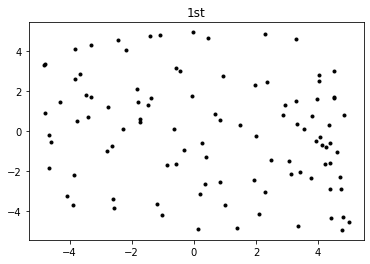

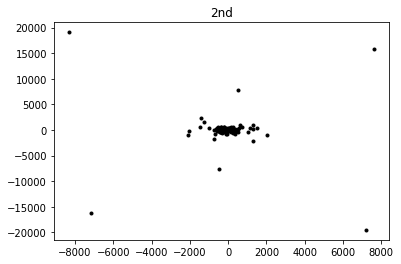

,position,velocity,force,mass,value,acceleration
0,"{'x': 25.82161071141911, 'y': 122.74118828846717}","{'x': -0.0008961713908397127, 'y': -0.01643434...","{'x': -0.00014874854907587136, 'y': -0.0016388...",0.999968,-1.573215e+04,"{'x': -0.0001486046912894352, 'y': -0.00163725..."
1,"{'x': -2078.9436366080895, 'y': -953.439877420...","{'x': -0.004589291277339756, 'y': -0.001880030...","{'x': 0.00015416039115264456, 'y': 9.216367065...",0.987946,-5.231054e+06,"{'x': 0.0001558834956812277, 'y': 9.3193816187..."
2,"{'x': 1010.9847243375922, 'y': -333.9460840953...","{'x': -0.0036529072113416143, 'y': 0.001674019...","{'x': -0.0006631735801507648, 'y': 0.000265880...",0.997391,-1.133610e+06,"{'x': -0.000664242190952513, 'y': 0.0002663085..."
3,"{'x': -675.9336145558832, 'y': -866.5437989001...","{'x': 0.0027003558049703393, 'y': 0.0032198478...","{'x': 0.0004680658780360778, 'y': 0.0005769946...",0.997220,-1.207784e+06,"{'x': 0.00046890040176025393, 'y': 0.000578023..."
4,"{'x': 262.82333704557794, 'y': -1.959757332192...","{'x': 0.17001787918908462, 'y': -1.31041665314...","{'x': -0.012368739176469438, 'y': 0.0039892802...",0.999845,-6.907995e+04,"{'x': -0.012358295370362728, 'y': 0.0039859118..."
...,...,...,...,...,...,...
95,"{'x': -352.019936631874, 'y': -298.6302766672372}","{'x': -0.010009036154590029, 'y': -0.025091296...","{'x': -0.0009063380161180581, 'y': -0.00244061...",0.999513,-2.130981e+05,"{'x': -0.000905873205261362, 'y': -0.002439358..."
96,"{'x': 229.43029154944443, 'y': 14.233862909370...","{'x': 0.02169088416558369, 'y': 0.055635758742...","{'x': -0.002166265867307141, 'y': 0.0030175178...",0.999883,-5.284086e+04,"{'x': -0.002164355785570712, 'y': 0.0030148572..."
97,"{'x': -101.4072303468762, 'y': 272.5558156653692}","{'x': -0.00030525345728538313, 'y': -0.0482609...","{'x': -6.841512299696616e-06, 'y': -0.00498174...",0.999809,-8.457010e+04,"{'x': -6.8359794063880905e-06, 'y': -0.0049777..."
98,"{'x': 336.7995343358449, 'y': -822.0881188892297}","{'x': -0.004693393731338679, 'y': 0.0098210446...","{'x': -0.0005678808875593779, 'y': 0.001224093...",0.998185,-7.892628e+05,"{'x': -0.0005683440941806801, 'y': 0.001225092..."


In [50]:
system = createSystem(100, createMember)

plotSystem(system, title='1st')

for i in range(100):
  simulationStep(system, dt=1, g = 9.81)

plotSystem(system, title='2nd')

systemDF = pd.DataFrame(system)
display(systemDF)

